## Como crear una red neuronal en Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F # capas sin parametros

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
class Net(nn.Module):
    
    def __init__(self, num_channels):
        super(Net, self).__init__()      
        self.num_channels = num_channels
        
        # Definimos las capas conv
        self.conv1 = nn.Conv2d(3, self.num_channels, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(self.num_channels, self.num_channels*2, 3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(self.num_channels*2, self.num_channels*4, 3, stride=1, padding=1)
        
        # Definimos las capas Fully-Connected
        self.fc1 = nn.Linear(self.num_channels*4*8*8, self.num_channels*4)
        self.fc2 = nn.Linear(self.num_channels*4, 6)
        
        def forward(self, x):
            # Empieza 3x64x64
            x = self.conv1(x) # -> num_channels x 64 x 64
            x = F.relu(F.max_pool2d(x, 2)) # -> num_channels x 32 x 32
            x = self.conv2(x) # -> num_channels*2 x 32 x 32
            x = F.relu(F.max_pool2d(x, 2)) # -> num_channels*2 x 16 x 16
            x = self.conv3(x) # -> num_channels*4 x 16 x 16
            x = F.relu(F.max_pool2d(x, 2)) # -> num_channels*4 x 8 x 8
            
            # Flatten
            x = x.view(-1, self.num_channels*4*8*8)
            
            # Fully Connected
            x = self.fc1(x)
            x = F.relu(x)
            x = self.fc2(x)
            
            # log SoftMax
            x = F.log_softmax(x, dim=1)
            
            return x

## Carga de datos

In [4]:
import sys
sys.path.append('/dl-pytorch/datasets/')

In [5]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class SIGNSDataset(Dataset):
    def __init__(self, base_dir, split='train', transform=None):
        path = os.path.join(base_dir, "{}_signs".format(split))
        files = os.listdir(path)
        
        self.filesnames = [os.path.join(path, f) for f in files if f.endswith(".jpg")]
        
        self.targets = [int(f[0]) for f in files]
        self.transform = transform
        
    def __len__(self):
        return len(self.filesnames)
    
    def __getitem__(self, idx):
        image = Image.open(self.filesnames[idx])
        if self.transform:
            image = self.transform(image)
        return image, self.targets[idx]

In [6]:
signs = SIGNSDataset("C:\\Users\\masan\\Desktop\\Cursos Platzi\\Deep learning con Pytorch\\dl-pytorch\\datasets", split="train")

In [7]:
len(signs)

864

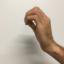

In [8]:
signs[0][0]

---

## Como entrenar la red.

### Preprocesamiento de imagenes

In [9]:
import torchvision.transforms as transforms

In [10]:
# Vamos a convertir nuestro DS en un tensor.
trainset = signs = SIGNSDataset("C:\\Users\\masan\\Desktop\\Cursos Platzi\\Deep learning con Pytorch\\dl-pytorch\\datasets",
                                split="train", transform = transforms.ToTensor())

In [11]:
# El dataloader nos sirve para  cargar las imagenes por lotes
# de maera convencional se establece que el batcjh_size = 32
dataloader = DataLoader(trainset, batch_size=32)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 

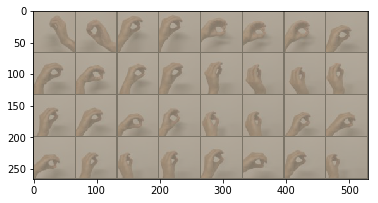

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


In [24]:
from torchvision.utils import make_grid # 

for inputs, targets in dataloader:
    out = make_grid(inputs)
    imshow(out)
    print(targets)
    break

In [25]:
import torch.optim as optim

Instanciar cosas.

In [32]:
net = Net(32).to(device)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

In [33]:
class RunningMetric():
    def __init__(self):
        self.S = 0
        self.N = 0
        
    def update(self, val, size):
        self.S += val
        self.N += size
    
    def __cal__(self):
        return self.S/float(self.N)